<a href="https://colab.research.google.com/github/85honesty/Mini_Project/blob/main/Mini_stiker_Face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 카메라 스티커앱 만들기
- 이미지 `png파일 선호`
- 배경이 없는 png 파일을 사용하는 것이 `휠씬 빠르고 간편`합니다.
- `png(Portable Network Graphics)` 파일로, `무손실 압축`을 사용하기 때문에 `이미지 손실이 없고 고품질 이미지를 생성`하여 이미지 편집에 많이 사용되는 파일입니다.
- `png 파일은 배경이 투명해서 배경 이미지 위에 png 파일을 얹어 두 이미지를 자연스럽게 합성`시킬 수 있습니다.

In [1]:
# 구글 마운트 시작(구글 드라이브 연동)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import requests
import io
from io import BytesIO

In [3]:
# 이미지 출력
from google.colab.patches import cv2_imshow

In [4]:
imageFile = '/content/drive/MyDrive/Mini_Project/Mini_stiker_Face_detection/camera_sticker/images/Korea_food/갈비구이/Img_000_0035.png'
 
img_bgr = cv2.imread(imageFile)

In [5]:
type(img_bgr)

numpy.ndarray

In [6]:
img_bgr.shape

(332, 500, 3)

In [7]:
img_bgr

array([[[ 98, 112, 108],
        [100, 114, 110],
        [103, 114, 111],
        ...,
        [230, 229, 225],
        [232, 230, 229],
        [234, 232, 231]],

       [[100, 114, 110],
        [100, 114, 110],
        [101, 112, 109],
        ...,
        [230, 229, 225],
        [232, 230, 229],
        [235, 233, 232]],

       [[ 98, 112, 108],
        [ 97, 111, 107],
        [ 96, 110, 106],
        ...,
        [231, 230, 226],
        [232, 231, 227],
        [234, 233, 229]],

       ...,

       [[  8,   0,   1],
        [ 11,   3,   4],
        [ 13,   6,   9],
        ...,
        [ 44,  38,  39],
        [ 40,  33,  36],
        [ 45,  40,  42]],

       [[  9,   1,   2],
        [  8,   0,   1],
        [ 10,   3,   6],
        ...,
        [ 43,  38,  37],
        [ 43,  38,  39],
        [ 42,  40,  40]],

       [[  8,   0,   1],
        [  8,   0,   1],
        [  7,   0,   3],
        ...,
        [ 47,  42,  39],
        [ 51,  46,  47],
        [ 46,  44,  44]]

OpenCV의 채널 순서
- OpenCV를 통해 영상(이미지)를 다룰 때의 채널 순서는 B G R
- matplotlib은 R G B 순서

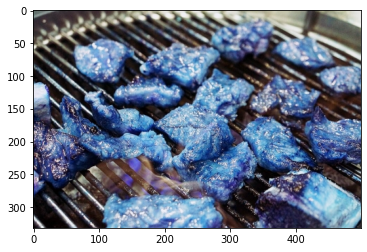

In [8]:
# 디폴트 값이 bgr로 되어 있고 색상값이 블루계열로 나옴 : 기본값이 B G R이여서 이렇게 됨
img_copy = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_copy)
plt.show()

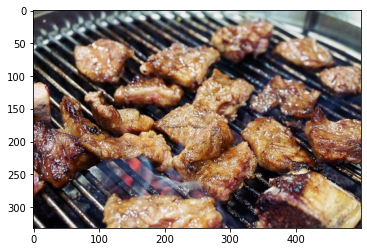

In [9]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [10]:
print(img_copy[:, :, 0])
print(img_copy[:,:,0].shape)

[[ 98 100 103 ... 230 232 234]
 [100 100 101 ... 230 232 235]
 [ 98  97  96 ... 231 232 234]
 ...
 [  8  11  13 ...  44  40  45]
 [  9   8  10 ...  43  43  42]
 [  8   8   7 ...  47  51  46]]
(332, 500)


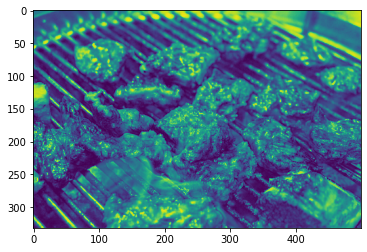

In [11]:
# R 레드 채널만 보기
plt.imshow(img_copy[:, :, 0])
plt.show()

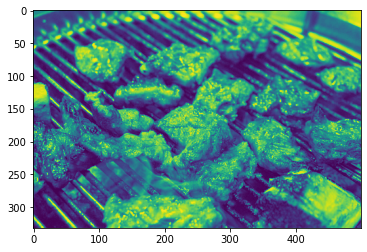

In [12]:
# G 그린 채널만 보기
plt.imshow(img_copy[:, :, 1])
plt.show()

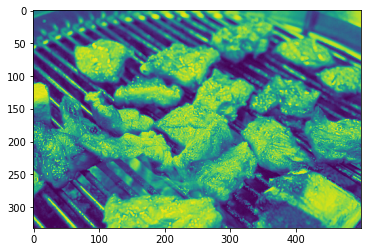

In [13]:
# B 블루 채널만 보기
plt.imshow(img_copy[:, :, 2])
plt.show()

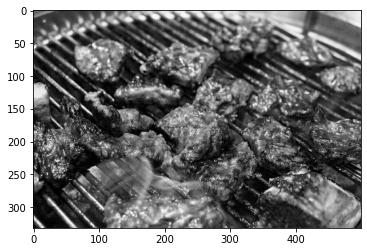

In [14]:
# R 레드 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_copy[:, :, 0], cmap='gray') #cmap : color map
plt.show()

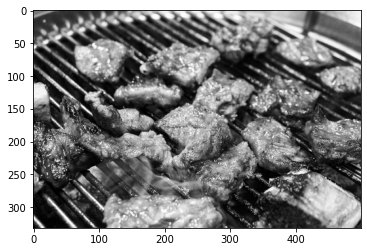

In [15]:
# G 그린 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_copy[:, :, 1], cmap='gray') #cmap : color map
plt.show()

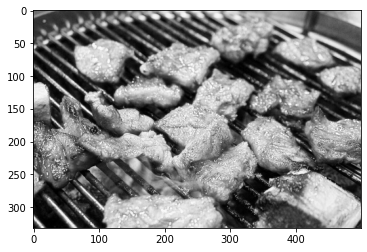

In [16]:
# B 블루 채널만 보기 + color map : 회색 gray  적용
plt.imshow(img_copy[:, :, 2], cmap='gray') #cmap : color map
plt.show()

In [17]:
# R 채널 분포 확인
pic_red = img_rgb.copy()
pic_red[:, :, 1] = 0
pic_red[:, :, 2] = 0

In [18]:
pic_red

array([[[108,   0,   0],
        [110,   0,   0],
        [111,   0,   0],
        ...,
        [225,   0,   0],
        [229,   0,   0],
        [231,   0,   0]],

       [[110,   0,   0],
        [110,   0,   0],
        [109,   0,   0],
        ...,
        [225,   0,   0],
        [229,   0,   0],
        [232,   0,   0]],

       [[108,   0,   0],
        [107,   0,   0],
        [106,   0,   0],
        ...,
        [226,   0,   0],
        [227,   0,   0],
        [229,   0,   0]],

       ...,

       [[  1,   0,   0],
        [  4,   0,   0],
        [  9,   0,   0],
        ...,
        [ 39,   0,   0],
        [ 36,   0,   0],
        [ 42,   0,   0]],

       [[  2,   0,   0],
        [  1,   0,   0],
        [  6,   0,   0],
        ...,
        [ 37,   0,   0],
        [ 39,   0,   0],
        [ 40,   0,   0]],

       [[  1,   0,   0],
        [  1,   0,   0],
        [  3,   0,   0],
        ...,
        [ 39,   0,   0],
        [ 47,   0,   0],
        [ 44,   0,   0]]

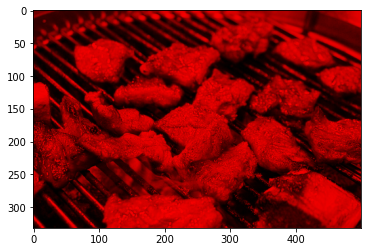

In [19]:
plt.imshow(pic_red)
plt.show()

In [20]:
pic_green = img_rgb.copy()
pic_green[:, :, 0] = 0
pic_green[:, :, 2] = 0

In [21]:
print(pic_green)

[[[  0 112   0]
  [  0 114   0]
  [  0 114   0]
  ...
  [  0 229   0]
  [  0 230   0]
  [  0 232   0]]

 [[  0 114   0]
  [  0 114   0]
  [  0 112   0]
  ...
  [  0 229   0]
  [  0 230   0]
  [  0 233   0]]

 [[  0 112   0]
  [  0 111   0]
  [  0 110   0]
  ...
  [  0 230   0]
  [  0 231   0]
  [  0 233   0]]

 ...

 [[  0   0   0]
  [  0   3   0]
  [  0   6   0]
  ...
  [  0  38   0]
  [  0  33   0]
  [  0  40   0]]

 [[  0   1   0]
  [  0   0   0]
  [  0   3   0]
  ...
  [  0  38   0]
  [  0  38   0]
  [  0  40   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0  42   0]
  [  0  46   0]
  [  0  44   0]]]


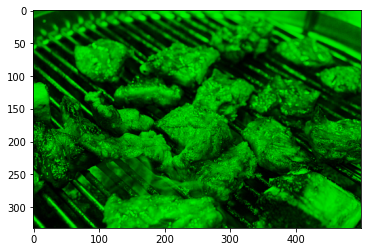

In [22]:
plt.imshow(pic_green)
plt.show()

In [23]:
pic_blue = img_rgb.copy()
pic_blue[:, :, 0] = 0
pic_blue[:, :, 1] = 0

In [24]:
pic_blue

array([[[  0,   0,  98],
        [  0,   0, 100],
        [  0,   0, 103],
        ...,
        [  0,   0, 230],
        [  0,   0, 232],
        [  0,   0, 234]],

       [[  0,   0, 100],
        [  0,   0, 100],
        [  0,   0, 101],
        ...,
        [  0,   0, 230],
        [  0,   0, 232],
        [  0,   0, 235]],

       [[  0,   0,  98],
        [  0,   0,  97],
        [  0,   0,  96],
        ...,
        [  0,   0, 231],
        [  0,   0, 232],
        [  0,   0, 234]],

       ...,

       [[  0,   0,   8],
        [  0,   0,  11],
        [  0,   0,  13],
        ...,
        [  0,   0,  44],
        [  0,   0,  40],
        [  0,   0,  45]],

       [[  0,   0,   9],
        [  0,   0,   8],
        [  0,   0,  10],
        ...,
        [  0,   0,  43],
        [  0,   0,  43],
        [  0,   0,  42]],

       [[  0,   0,   8],
        [  0,   0,   8],
        [  0,   0,   7],
        ...,
        [  0,   0,  47],
        [  0,   0,  51],
        [  0,   0,  46]]

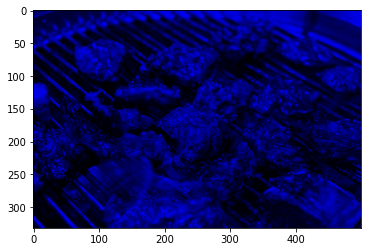

In [25]:
plt.imshow(pic_blue)
plt.show()

In [26]:
img_rgb

array([[[108, 112,  98],
        [110, 114, 100],
        [111, 114, 103],
        ...,
        [225, 229, 230],
        [229, 230, 232],
        [231, 232, 234]],

       [[110, 114, 100],
        [110, 114, 100],
        [109, 112, 101],
        ...,
        [225, 229, 230],
        [229, 230, 232],
        [232, 233, 235]],

       [[108, 112,  98],
        [107, 111,  97],
        [106, 110,  96],
        ...,
        [226, 230, 231],
        [227, 231, 232],
        [229, 233, 234]],

       ...,

       [[  1,   0,   8],
        [  4,   3,  11],
        [  9,   6,  13],
        ...,
        [ 39,  38,  44],
        [ 36,  33,  40],
        [ 42,  40,  45]],

       [[  2,   1,   9],
        [  1,   0,   8],
        [  6,   3,  10],
        ...,
        [ 37,  38,  43],
        [ 39,  38,  43],
        [ 40,  40,  42]],

       [[  1,   0,   8],
        [  1,   0,   8],
        [  3,   0,   7],
        ...,
        [ 39,  42,  47],
        [ 47,  46,  51],
        [ 44,  44,  46]]